In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Calling all the required librarbies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, kmeans_plusplus, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, rand_score, v_measure_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score
from sklearn.decomposition import PCA

from sklearn.metrics import homogeneity_score, completeness_score, rand_score, v_measure_score
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

!pip install yellowbrick -q
from yellowbrick.cluster import KElbowVisualizer


from tensorflow import keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input

import os
import sys
import gc

In [3]:
df = pd.read_csv('/content/drive/MyDrive/USML_final_project/Final/features_all_methods1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotion
0,0.103149,0.646820,0.553774,0.428459,0.396023,0.427617,0.469151,0.474649,0.483870,0.534888,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,happy
1,0.272753,0.793239,0.751165,0.650540,0.610080,0.621301,0.618765,0.556584,0.560516,0.580986,...,0.007715,0.008040,0.007730,0.007560,0.007755,0.007561,0.007625,0.007330,0.007575,happy
2,0.116546,0.602004,0.716895,0.545718,0.421082,0.401227,0.444282,0.479256,0.456141,0.467201,...,0.000003,0.000003,0.000002,0.000002,0.000003,0.000005,0.000010,0.000013,0.000013,happy
3,0.161685,0.607867,0.607035,0.536918,0.525360,0.492009,0.510087,0.546449,0.593302,0.608940,...,0.000013,0.000012,0.000010,0.000009,0.000009,0.000008,0.000008,0.000007,0.000007,angry
4,0.327218,0.724648,0.725036,0.680657,0.707147,0.675237,0.635063,0.606967,0.644423,0.661463,...,0.009036,0.009029,0.009163,0.009624,0.009423,0.009265,0.009275,0.008739,0.009597,angry


In [4]:
df.shape

(25566, 163)

In [5]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [6]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=0, shuffle=True, stratify=Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(23009, 162) (23009,) (2557, 162) (2557,)


In [8]:
# Creating required functions

def contingency_mat(train, train_pred):

    print('''
            =========================================================
            CONTINGENCY MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))




# Code to printout entire table #
scores = pd.DataFrame(columns=['Model','Train Homogeneity socre','Train Completeness score','Train V Measure Score', 'Train Rand score','Train Adjusted Rand Score', 'Train Silhoutte Score'])

def get_metrics(x_input, train_actual,train_pred, model_description,dataframe):
    contingency_mat(train_actual,train_pred)
    homo_gen = homogeneity_score(train_actual, train_pred)
    comp_score = completeness_score(train_actual, train_pred)
    vm_score = v_measure_score(train_actual, train_pred)
    rand = rand_score(train_actual, train_pred)
    adj_rand = adjusted_rand_score(y_train, train_pred)
    sh_score = silhouette_score(x_input, train_pred)
    
    dataframe = dataframe.append(pd.Series([model_description, homo_gen, comp_score, vm_score, rand, adj_rand, sh_score], index=scores.columns), ignore_index=True)
    
    return dataframe

def plots(x1_dim, x2_dim, actual_values, pred_values, title):
  #plt.figure(figsize=(12,15))
  df = pd.DataFrame({'X1': x1_dim, 'X2': x2_dim, 'y_actual': actual_values, 'y_pred': pred_values})
  f, ax = plt.subplots(1, 2, sharey='row')
  f.set_figheight(6)
  f.set_figwidth(13)
  sns.scatterplot(x='X1', y='X2', data=df, hue='y_actual', ax = ax[0], palette='viridis')
  ax[0].set_title('Actual Labels')
  sns.scatterplot(x='X1', y='X2', data=df, hue='y_pred', ax = ax[1], palette='viridis')
  ax[1].set_title('Clusters formed')
  f.suptitle(title)

  plt.show()


In [9]:
# Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Building on Normal Data

In [10]:
# Building Kmeans
kmeans = KMeans(init='k-means++', random_state=340, n_init = 10, max_iter = 200, n_clusters=7)
kmeans.fit(x_train)

scores = get_metrics(x_train, y_train, kmeans.predict(x_train), 'Kmeans on Normal data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted    0     1    2   3     4   5    6
Actual                                      
0          670   701  201  55  1466  70  431
1          636  1213   30   0  2239   2   13
2          524   943   59   6  1959  33   70
3          562   963   54   2  1919  61   33
4          350   936    1   0  1972   0    0
5          754  1051    7   0  2315   4    2
6          610    18   17   2     0  54    1


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.01802,0.198994


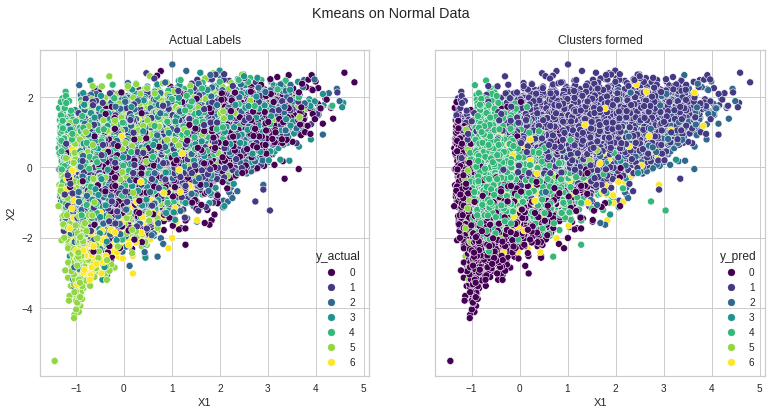

In [11]:
plots(x_train[:, 0], x_train[:, 1], y_train, kmeans.predict(x_train), 'Kmeans on Normal Data')

In [12]:
# Building Gaussian Mixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(7, covariance_type='full', random_state=0).fit(x_train)

scores = get_metrics(x_train, y_train, gmm.predict(x_train), 'GMM on Normal Data data', scores)
scores

/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(



            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted     0     1    2     3   4    5    6
Actual                                        
0          1136   156  495   408  73  446  880
1            96  1519  423  1499   0   58  538
2           282  1405  357   944   8  138  460
3           274   630  526  1158   2  119  885
4             6  1483  183  1294   0    4  289
5             9  3239  128   628   0    9  120
6             0   166   95   348   2   41   50


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125


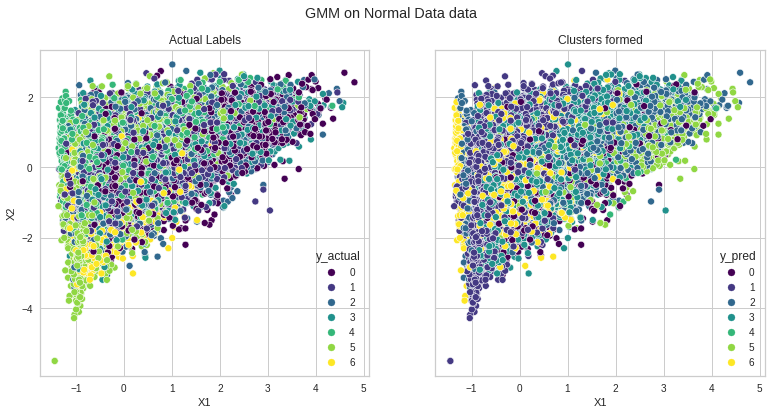

In [13]:
plots(x_train[:, 0], x_train[:, 1], y_train, gmm.predict(x_train), 'GMM on Normal Data data');

In [14]:
#Building Birch model
from sklearn.cluster import Birch
birch_model = Birch(threshold=0.3, branching_factor=40, n_clusters=7)

birch_model.fit(x_train)

scores = get_metrics(x_train, y_train, birch_model.predict(x_train), 'Birch on Normal Data data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted    0    1   2    3     4   5     6
Actual                                      
0          987  145  53   62  1805  41   501
1           92   16   0  509  2297   0  1219
2          226   33  25   90  2285   4   931
3          181   43  38   65  2312   2   953
4            1    1   0  297  2018   0   942
5           17    1   0  669  2329   0  1117
6            7   10  26  571    23   2    63


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877


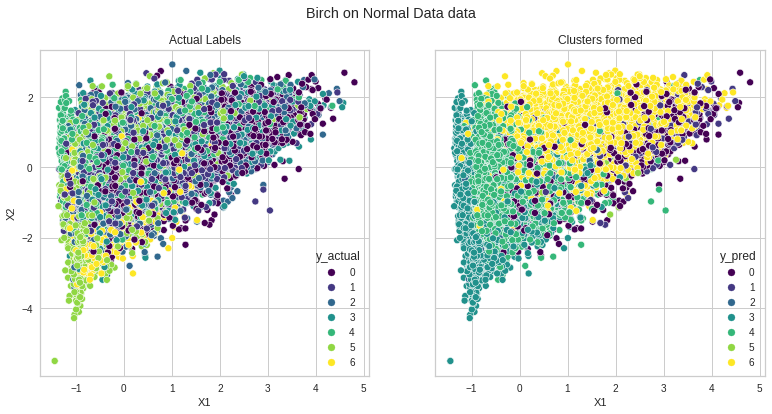

In [15]:
plots(x_train[:, 0], x_train[:, 1], y_train, birch_model.predict(x_train), 'Birch on Normal Data data')

# Model Building on PCA Data

In [16]:
pca = PCA(n_components= 0.98)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_pca.shape

(23009, 99)

In [17]:
kmeans = KMeans(random_state=340, n_init = 12, max_iter = 200, n_clusters=7)
kmeans.fit(x_train_pca)

scores = get_metrics(x_train_pca, y_train, kmeans.predict(x_train_pca), 'Kmeans on PCA data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted     0    1    2    3     4   5   6
Actual                                      
0           701  429  204  681  1456  55  68
1          1213   13   30  637  2238   0   2
2           943   69   60  526  1957   6  33
3           959   33   54  570  1915   2  61
4           937    0    1  353  1968   0   0
5          1051    2    7  754  2315   0   4
6            18    1   17  608     0   2  56


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431


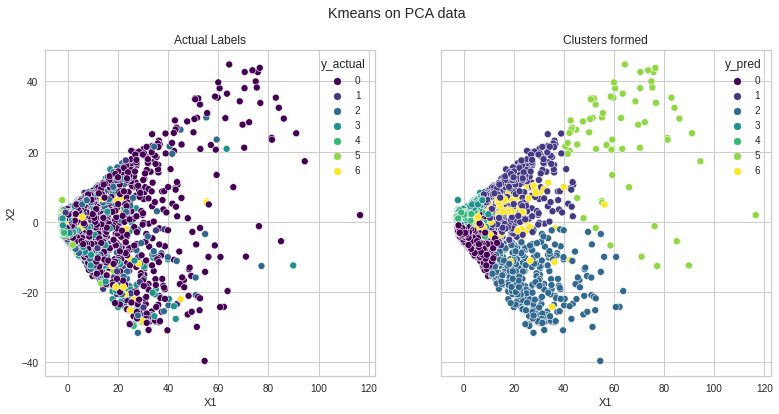

In [18]:
plots(x_train_pca[:, 0], x_train_pca[:, 1], y_train, kmeans.predict(x_train_pca), 'Kmeans on PCA data')

In [19]:
gmm = GaussianMixture(7, covariance_type='full', random_state=0).fit(x_train_pca)

scores = get_metrics(x_train_pca, y_train, gmm.predict(x_train_pca), 'GMM on PCA Data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted     0     1     2     3   4   5    6
Actual                                        
0          1413   426  1114   145  13  76  407
1           166  1580   855  1471   0   0   61
2           377   994   684  1362   6   9  162
3           434  1223  1234   568   6   2  127
4             4  1420   424  1404   0   0    7
5            14   692   211  3204   0   0   12
6             1   400    52   156   0   2   91


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708


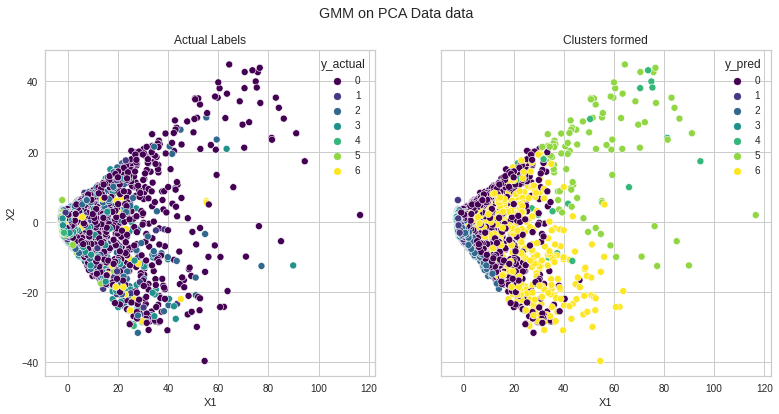

In [20]:
plots(x_train_pca[:, 0], x_train_pca[:, 1], y_train, gmm.predict(x_train_pca), 'GMM on PCA Data data');

In [21]:
birch_model = Birch(threshold=0.5, n_clusters=7)

birch_model.fit(x_train_pca)

scores = get_metrics(x_train_pca, y_train, birch_model.predict(x_train_pca), 'Birch on PCA data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted    0   1    2    3     4     5   6
Actual                                      
0          972  81  146  418  1449   481  47
1          648   0   17   19  2290  1159   0
2          370   9   37   89  2181   882  26
3          368   2   46   48  2212   889  29
4          301   0    1    0  2041   916   0
5          680   0    5    2  2390  1056   0
6          597   0   14    3     1    63  24


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768


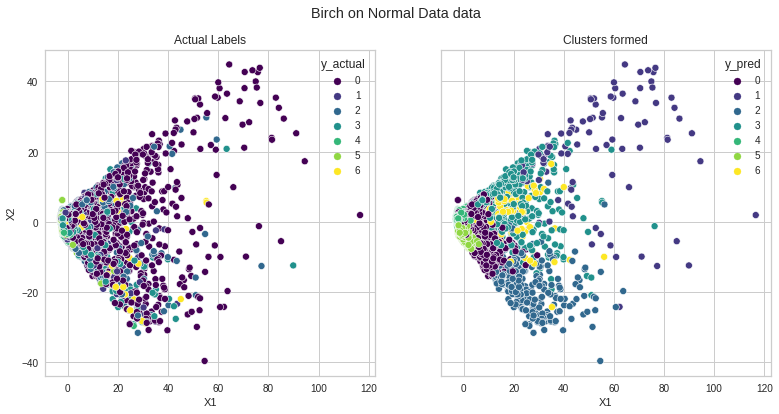

In [22]:
plots(x_train_pca[:, 0], x_train_pca[:, 1], y_train, birch_model.predict(x_train_pca), 'Birch on Normal Data data');

# Model Building on Autoencoders Data

In [23]:
import tensorflow as tf
tf.random.set_seed(340)
input_layer = Input(shape=(x_train.shape[1],),dtype='int32')
x = Dense(128, activation='relu', kernel_initializer='glorot_normal')(input_layer)
x = Dense(100, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(64, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(32, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(16, activation='relu', kernel_initializer='glorot_normal')(x)
encoded = Dense(10, activation='relu', kernel_initializer='glorot_normal')(x)

# Decoding
x = Dense(16, activation='relu', kernel_initializer='glorot_normal')(encoded)
x = Dense(32, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(64, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(100, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(128, activation='relu', kernel_initializer='glorot_normal')(x)
decoded = Dense(x_train.shape[1], activation='linear', kernel_initializer='glorot_normal')(x)

In [24]:
autoencoder = keras.Model(input_layer, decoded)

In [25]:
encoder = keras.Model(input_layer, encoded)

In [26]:
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae')

In [27]:
x_train.shape

(23009, 162)

In [28]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_split = 0.2)

Epoch 1/50
288/288 [==============================] - 3s 7ms/step - loss: 0.2719 - val_loss: 0.2309
Epoch 2/50
288/288 [==============================] - 2s 6ms/step - loss: 0.2176 - val_loss: 0.2131
Epoch 3/50
288/288 [==============================] - 2s 6ms/step - loss: 0.2077 - val_loss: 0.2083
Epoch 4/50
288/288 [==============================] - 2s 6ms/step - loss: 0.2037 - val_loss: 0.2041
Epoch 5/50
288/288 [==============================] - 2s 6ms/step - loss: 0.2003 - val_loss: 0.2021
Epoch 6/50
288/288 [==============================] - 2s 5ms/step - loss: 0.1970 - val_loss: 0.1996
Epoch 7/50
288/288 [==============================] - 2s 6ms/step - loss: 0.1946 - val_loss: 0.1963
Epoch 8/50
288/288 [==============================] - 2s 6ms/step - loss: 0.1926 - val_loss: 0.1945
Epoch 9/50
288/288 [==============================] - 2s 6ms/step - loss: 0.1910 - val_loss: 0.1938
Epoch 10/50
288/288 [==============================] - 2s 6ms/step - loss: 0.1897 - val_loss: 0.1916

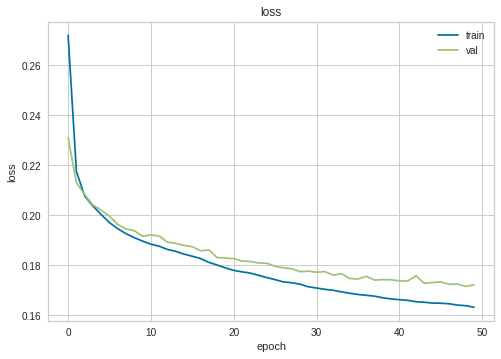

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [30]:
encoded_obs = encoder.predict(x_train)
encoded_obs = pd.DataFrame(encoded_obs)

720/720 [==============================] - 1s 2ms/step


In [31]:
cols = []
for i in range(len(encoded_obs.columns)):
  if i not in np.where(encoded_obs.nunique().values == 1)[0]:
    cols.append(encoded_obs.columns[i])
  
cols


[0, 1, 6, 7, 8, 9]

In [32]:
scaler = StandardScaler()
e1 = scaler.fit_transform(encoded_obs[cols])

In [33]:
kmeans = KMeans(init='k-means++', random_state=340, max_iter = 100, n_clusters = 6)
kmeans.fit(e1)

scores = get_metrics(e1, y_train, kmeans.predict(e1), 'Kmeans on Autoencoder Latent Spaces', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted     0    1    2    3     4   5
Actual                                  
0          2459  111  241  258   502  23
1          2580   12    3   43  1495   0
2          2297   23   45   78  1148   3
3          2809   32   30   68   655   0
4          2484    1    0    0   774   0
5          2080    0    0   11  2042   0
6           289   10   20   10   373   0


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313


In [34]:
pd.DataFrame(e1)

,0,1,2,3,4,5
0,-0.394708,-0.333617,-0.125289,-0.428797,-1.029470,-1.257608
1,-0.202868,-0.135354,-0.576378,-0.372216,-0.351270,-0.004835
2,3.808028,1.976937,-0.709938,-0.060322,-1.770335,-0.174959
3,-0.274299,-0.211726,1.447268,-0.427164,1.201244,0.422798
4,0.035905,0.091412,-0.709938,-0.365830,-0.420653,-0.196059
...,...,...,...,...,...,...
23004,-0.114707,-0.165715,0.373128,0.420227,0.523347,1.183312
23005,-0.229841,-0.310070,-0.413335,-0.069754,-0.353234,-0.469259
23006,-0.252878,-0.264890,0.288946,-0.043253,-0.789459,0.153667
23007,0.447113,0.061578,-0.709938,-0.068753,0.417948,0.694084


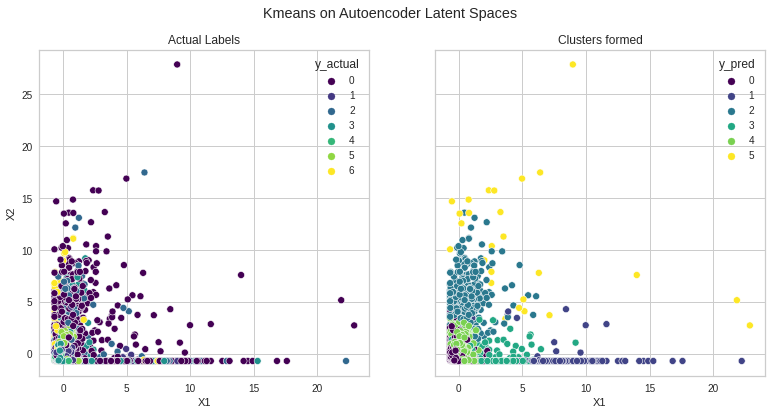

In [35]:
plots(e1[:, 0], e1[:, 2], y_train, kmeans.predict(e1), 'Kmeans on Autoencoder Latent Spaces');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


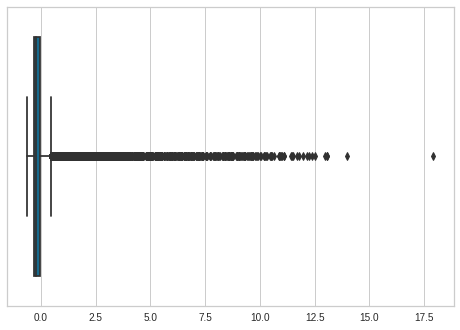

In [36]:
sns.boxplot(e1[:,1])

In [37]:
gc.collect()

49369

In [38]:
gmm = GaussianMixture(7, covariance_type='full', random_state=0).fit(e1)

scores = get_metrics(e1, y_train, gmm.predict(e1), 'GMM on Autoencoder Latent Spaces', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted     0     1    2     3    4    5  6
Actual                                       
0           484   820  486  1057  390  353  4
1          1089  1377   20  1051   47  549  0
2           879  1377  100   748  101  389  0
3           937  1267   93   693   90  514  0
4          1038  1385    2   414    1  419  0
5          1110  1726    9   933   16  339  0
6             1     3   51   623   22    2  0


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313
7,GMM on Autoencoder Latent Spaces,0.054810,0.067705,0.060579,0.677296,0.018781,-0.010374


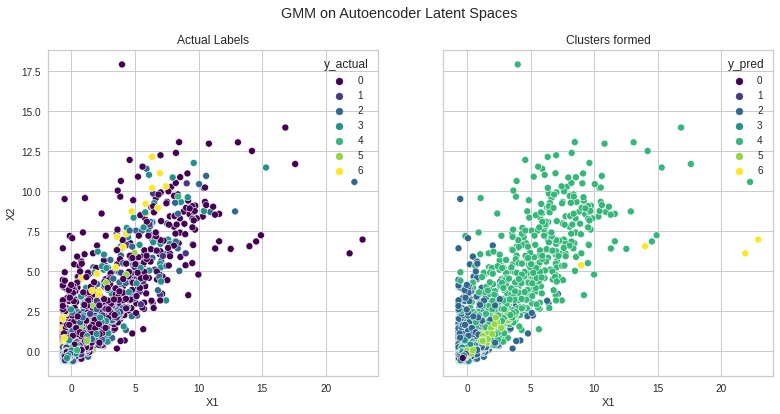

In [39]:
plots(e1[:, 0], e1[:, 1], y_train, gmm.predict(e1), 'GMM on Autoencoder Latent Spaces');

In [40]:
birch_model = Birch(threshold=0.025, n_clusters=7)

birch_model.fit(e1)

scores = get_metrics(e1, y_train, birch_model.predict(e1), 'Birch on Autoencoder Latent Spaces', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted   0     1    2     3    4    5     6
Actual                                        
0          21  1617  112   229  324  181  1110
1           0  1588   12  1110    4   30  1389
2           3  1626   27   689   65   56  1128
3           0  1508   33   341   46   48  1618
4           0  1259    1   454    0    0  1545
5           0  1657    1  1473    0    9   993
6           0   124   12   373   33    7   153


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313
7,GMM on Autoencoder Latent Spaces,0.054810,0.067705,0.060579,0.677296,0.018781,-0.010374
8,Birch on Autoencoder Latent Spaces,0.043986,0.066048,0.052805,0.625356,0.018955,0.204742


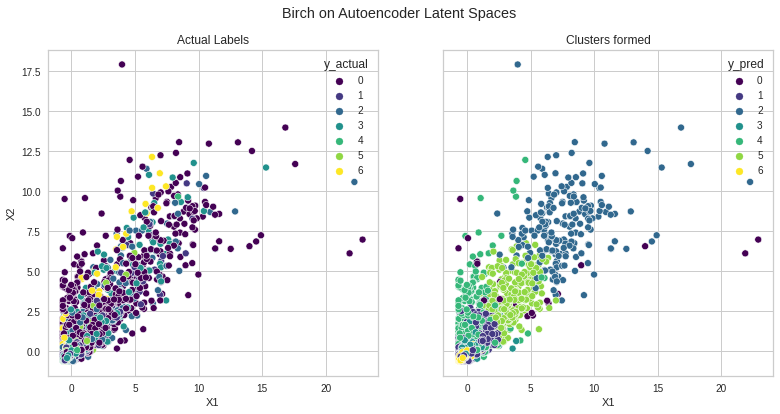

In [41]:
plots(e1[:, 0], e1[:, 1], y_train, birch_model.predict(e1), 'Birch on Autoencoder Latent Spaces');

In [42]:
scores.to_csv('/content/drive/MyDrive/USML_final_project/Final/outputs1.csv', index = False)